https://www.kaggle.com/shubh0799/churn-modelling

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [132]:
df.shape

(10000, 14)

**1000 samples, 14 feature variables**

**Remove the first 3 columns**

In [133]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Description

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [135]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Continuous: CreditScore, Age, Balance, EstimatedSalary**

**Ordinal: Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember**

**Nominal: Geography**

In [136]:
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Age,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.1,-0.0,0.3
Tenure,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
Balance,0.0,0.0,-0.0,1.0,-0.3,-0.0,-0.0,0.0,0.1
NumOfProducts,0.0,-0.0,0.0,-0.3,1.0,0.0,0.0,0.0,-0.0
HasCrCard,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
IsActiveMember,0.0,0.1,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.2
EstimatedSalary,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Exited,-0.0,0.3,-0.0,0.1,-0.0,-0.0,-0.2,0.0,1.0


<AxesSubplot:>

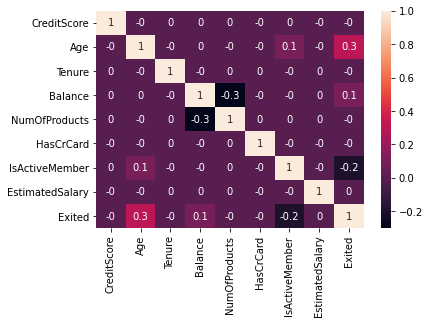

In [137]:
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

## EDA

### Histogram

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

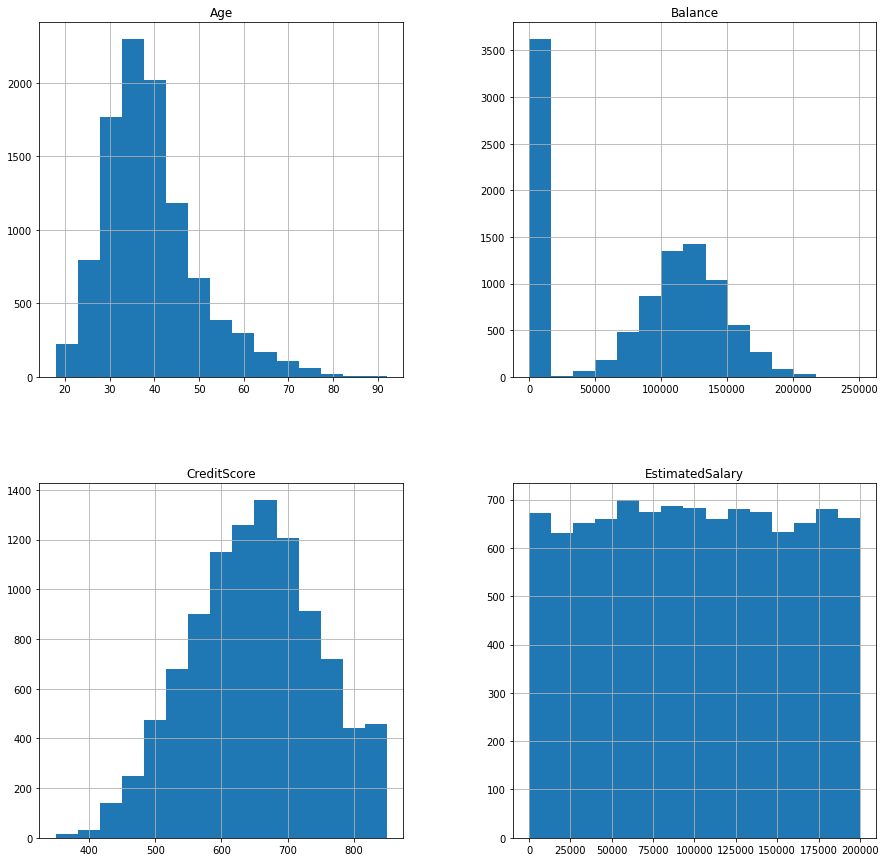

In [138]:
df.hist(["CreditScore", "Age", "Balance", "EstimatedSalary"], layout=(2,2), figsize=(15, 15), bins=15)

### Box plot

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


CreditScore           AxesSubplot(0.125,0.536818;0.352273x0.343182)
Age                AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Balance                  AxesSubplot(0.125,0.125;0.352273x0.343182)
EstimatedSalary       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

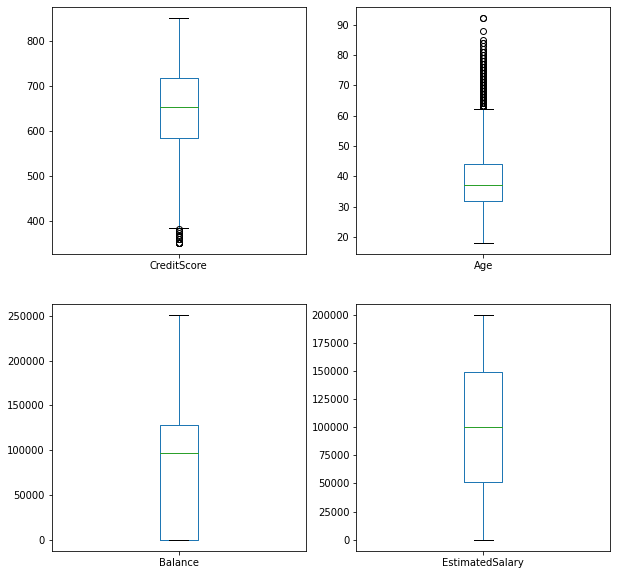

In [139]:
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].plot.box(subplots = True, layout=(2,2), figsize=(10, 10))

### Bar chart

<AxesSubplot:>

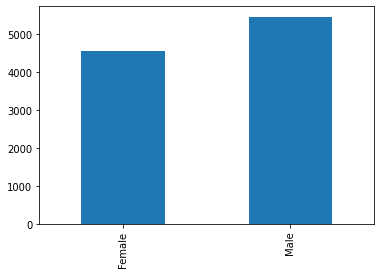

In [140]:
df['Gender'].value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='Gender'>

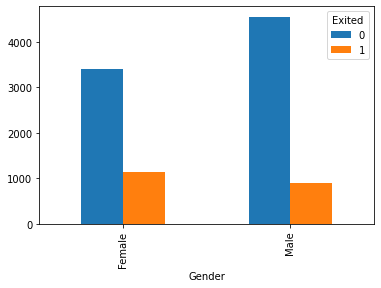

In [141]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar')

<AxesSubplot:>

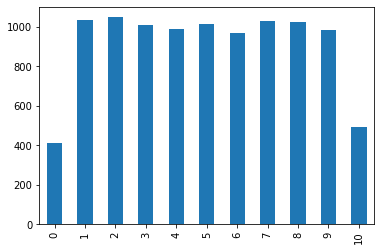

In [142]:
df['Tenure'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

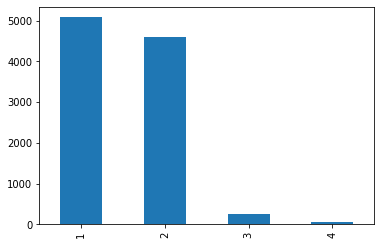

In [143]:
df['NumOfProducts'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

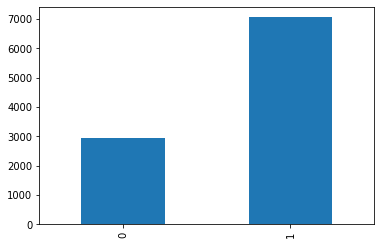

In [144]:
df['HasCrCard'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

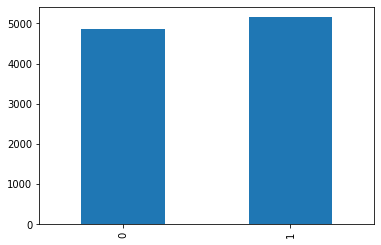

In [145]:
df['IsActiveMember'].value_counts().sort_index().plot.bar()

### Pie chart

<AxesSubplot:ylabel='Geography'>

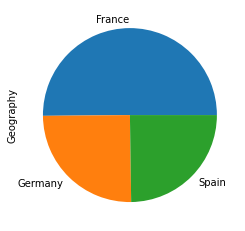

In [146]:
df['Geography'].value_counts().plot.pie()

In [22]:
for i in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    z_score = stats.zscore(df[i])
    print(len(df[np.abs(stats.zscore(df[i])) > 3][i]))
    print(i, ':', len(z_score[np.abs(z_score) > 3]))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Data Cleaning and Transformation

### Gender

In [147]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


### Geography

In [148]:
dummy = pd.get_dummies(df['Geography'])

dummy.head(10)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [149]:
df_new = pd.concat([df, dummy], axis=1)

df_new.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [150]:
df_new.drop(['Geography', 'Spain'], axis=1, inplace=True)

df_new.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0


In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(2)
memory usage: 761.8 KB


## Check outliers

In [152]:
from scipy import stats

In [154]:
for i in df_new.columns:
    print(i, ':', len(df_new[np.abs(stats.zscore(df_new[i])) > 3][i]))

CreditScore : 8
Gender : 0
Age : 133
Tenure : 0
Balance : 0
NumOfProducts : 60
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0
France : 0
Germany : 0


In [157]:
df_final = df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)]

df_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


**201 rows has been deleted**

**re-index**

In [158]:
index=pd.Index([i for i in range(9799)])

df_final.index = index

df_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9794,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9795,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9796,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9797,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


# Build Model

In [159]:
from sklearn import model_selection
from sklearn.metrics import classification_report # Reporting metric
from sklearn.metrics import confusion_matrix # classifies predicted values as TP, TN, FP, FN
from sklearn.metrics import accuracy_score # calculates accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [163]:
X = df_final.drop('Exited', axis=1)
y = df_final['Exited']

In [169]:
validation_size = 0.25
seed = 7
scoring = 'accuracy'

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [170]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: 0.794666 (0.017161)
LDA: 0.821609 (0.016795)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.766501 (0.016740)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: 0.784324 (0.013889)
NB: 0.794803 (0.018506)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM: 0.798477 (0.018555)


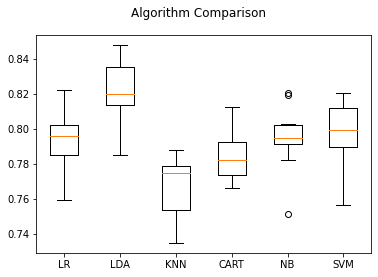

In [171]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**->  LR, LDA, SVM**